In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import time
import plotly.express as px
import plotly.graph_objs as go

In [2]:
scores=pd.read_csv('scores.csv')


In [3]:
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


<AxesSubplot:xlabel='days', ylabel='count'>

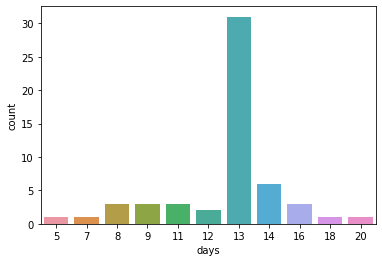

In [4]:
sns.countplot(x=scores['days'])

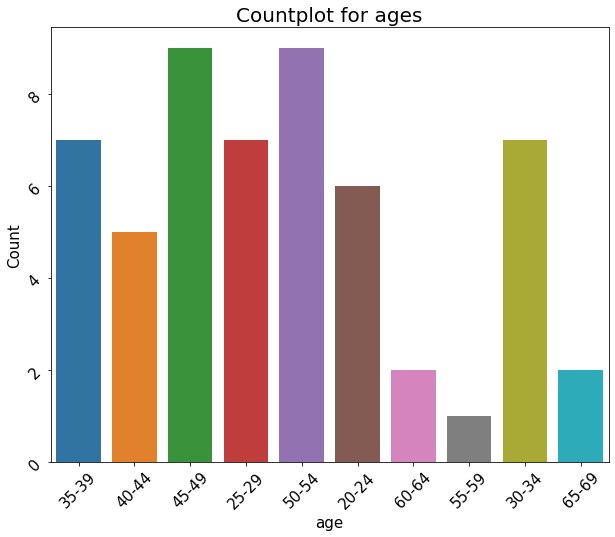

In [67]:
pl.figure(figsize=(10,8))
pl.title('Countplot for ages',fontsize=20)
sns.countplot(x=scores['age'])
pl.xticks(rotation=45,fontsize=15)
pl.xlabel('age',fontsize=15)
pl.yticks(rotation=45,fontsize=15)
pl.ylabel('Count',fontsize=15)

pl.show()

In [ ]:
sns.countplot(x=scores['edu'])

In [ ]:
# for i in scores.columns[1:]:
#     sns.countplot(x=scores[i])
#     pl.show()

In [10]:
scores['DeltaMADRS']=scores.madrs1-scores.madrs2

In [14]:
df=scores.copy()
df_condition=df[df['number'].str.contains('condition')].copy()
df_control=df[df['number'].str.contains('control')].copy()

In [17]:
df_condition.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,-1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0


In [18]:
df_control.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
23,control_1,8,2,25-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,control_2,20,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
25,control_3,12,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
26,control_4,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
27,control_5,13,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


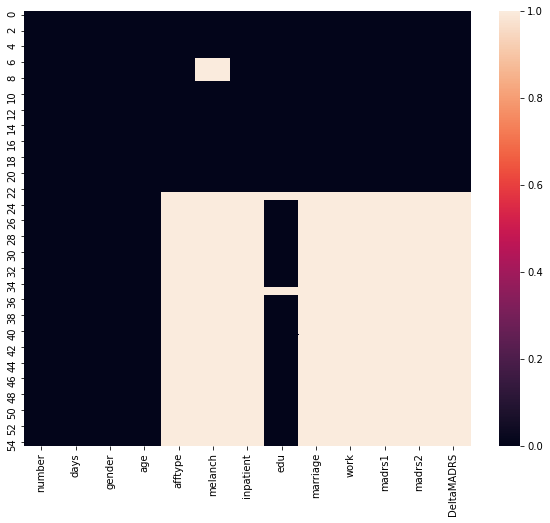

In [28]:
pl.figure(figsize=(10,8))
sns.heatmap(df.isnull())
pl.show()

In [29]:
text_missing='_MISSING_'

In [38]:
df_condition.melanch=df_condition.melanch.fillna(text_missing)
df_condition.melanch=df_condition.melanch.astype('category')
df_condition.melanch=df_condition.melanch.cat.rename_categories({
    -1:'text_missing',
    1.0:'1',
    2.0:'2'
})

<AxesSubplot:xlabel='melanch', ylabel='count'>

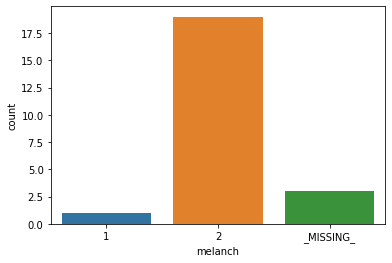

In [41]:
sns.countplot(x=df_condition['melanch'])

In [48]:
df_condition.age=df_condition.age.astype('category')
df_condition.gender=df_condition.gender.astype('category')


In [54]:
df_condition.afftype=df_condition.afftype.astype(int).astype('category')
df_condition.inpatient=df_condition.inpatient.astype(int).astype('category')
df_condition.marriage=df_condition.marriage.astype('int').astype('category')
df_condition.work=df_condition.work.astype(int).astype('category')

In [59]:
df_condition.edu=df_condition.edu.astype('category')
df_condition.edu=df_condition.edu.cat.rename_categories({' ':text_missing})

In [60]:
df_condition.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2,2,2,6-10,1,2,19.0,19.0,0.0
1,condition_2,18,2,40-44,1,2,2,6-10,2,2,24.0,11.0,13.0
2,condition_3,13,1,45-49,2,2,2,6-10,2,2,24.0,25.0,-1.0
3,condition_4,13,2,25-29,2,2,2,11-15,1,1,20.0,16.0,4.0
4,condition_5,13,2,50-54,2,2,2,11-15,2,2,26.0,26.0,0.0


In [68]:
features_num = ['days','madrs1','madrs2','DeltaMADRS']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

In [71]:
df_condition[features_num].describe()

,days,madrs1,madrs2,DeltaMADRS
count,23.000000,23.000000,23.000000,23.000000
mean,12.652174,22.739130,20.000000,2.739130
std,2.773391,4.797892,4.729021,3.968253
min,5.000000,13.000000,11.000000,-4.000000
25%,12.500000,18.500000,16.000000,0.000000
50%,13.000000,24.000000,21.000000,3.000000
75%,14.000000,26.000000,24.500000,5.000000
max,18.000000,29.000000,28.000000,13.000000


In [72]:
df_condition[features_cat].describe()

,age,gender,afftype,melanch,inpatient,edu,marriage,work
count,23,23,23,23,23,23,23,23
unique,10,2,3,3,2,4,2,2
top,45-49,2,2,2,2,6-10,2,2
freq,5,13,15,19,18,12,12,20


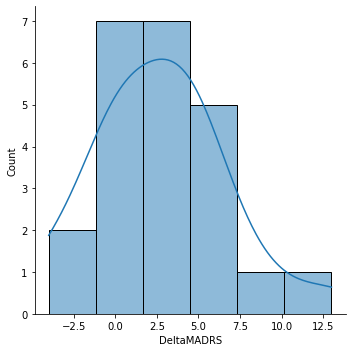

In [84]:
sns.displot(df['DeltaMADRS'],bins=6,
           kde=True)

In [97]:
df_condition_mads=df_condition.groupby('number')['madrs1','madrs2'].sum().reset_index()
df_condition_mads.head()

c:\users\rissu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,number,madrs1,madrs2
0,condition_1,19.0,19.0
1,condition_10,28.0,21.0
2,condition_11,24.0,24.0
3,condition_12,25.0,21.0
4,condition_13,18.0,13.0


In [107]:
fig=go.Figure()
fig.add_trace(go.Bar(
                    x=df_condition_mads['number'],
                    y=df_condition_mads['madrs1'],
    text=df_condition_mads['madrs1'],
    name='madrs1',
    textposition='inside'
))
fig.add_trace(go.Bar(
                    x=df_condition_mads['number'],
                    y=df_condition_mads['madrs2'],
    name='madrs2',
    text=df_condition_mads['madrs2'],
    textposition='inside'
))

fig.update_layout(title='Madrs Development',title_x=.5)


fig.show()

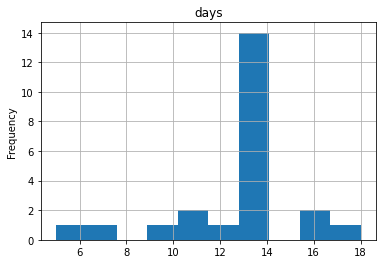

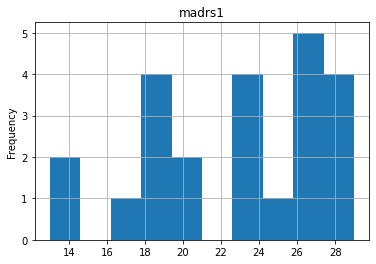

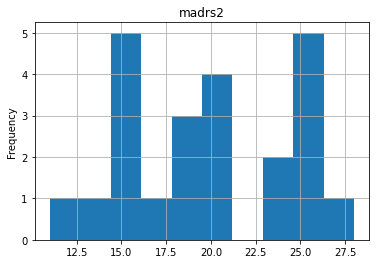

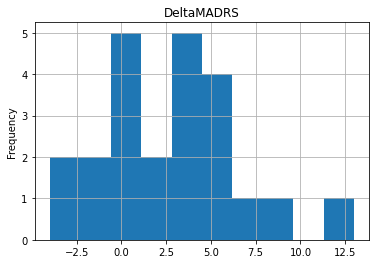

In [109]:
for f in features_num:
    df_condition[f].plot(kind='hist')
    pl.title(f)
    pl.grid()
    pl.show()

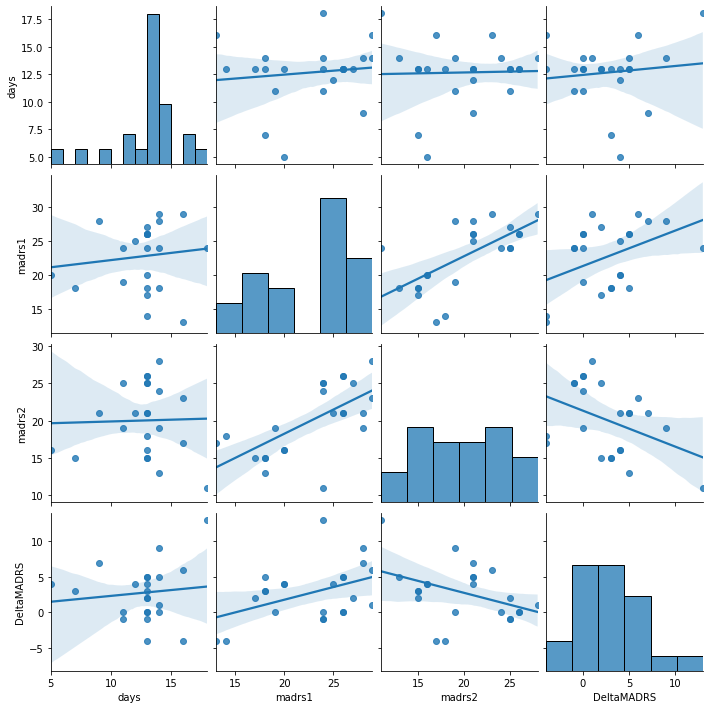

In [117]:
sns.pairplot(df_condition[features_num], kind='reg')
pl.show()

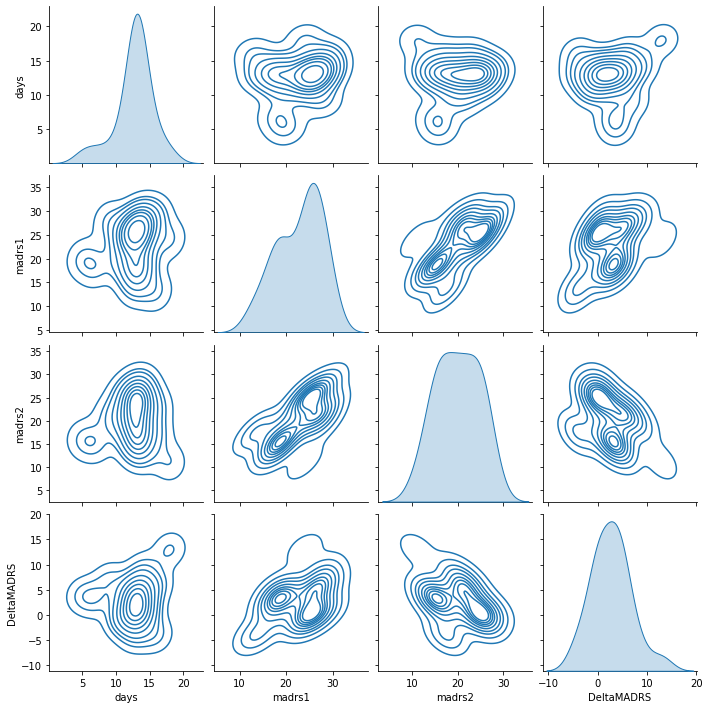

In [112]:
sns.pairplot(df_condition[features_num], kind='kde')
pl.show()

In [118]:
df_condition[features_num].corr(method='pearson')


,days,madrs1,madrs2,DeltaMADRS
days,1.000000,0.122678,0.027726,0.115285
madrs1,0.122678,1.000000,0.653090,0.430772
madrs2,0.027726,0.653090,1.000000,-0.402082
DeltaMADRS,0.115285,0.430772,-0.402082,1.000000


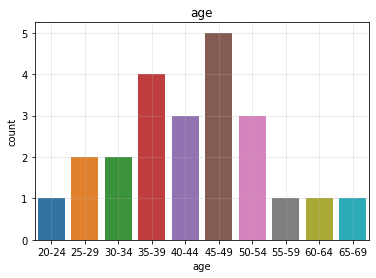

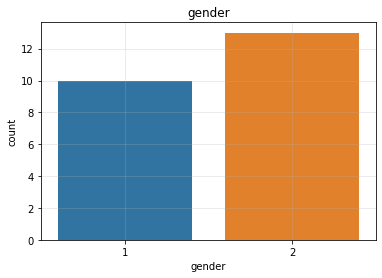

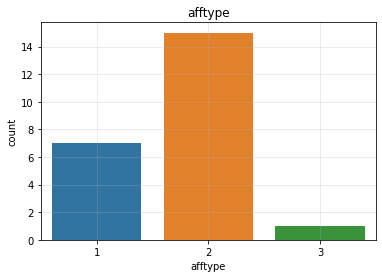

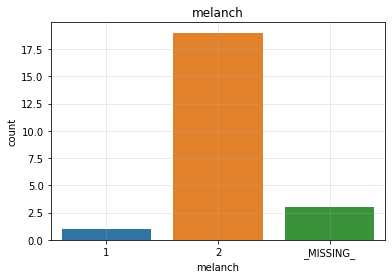

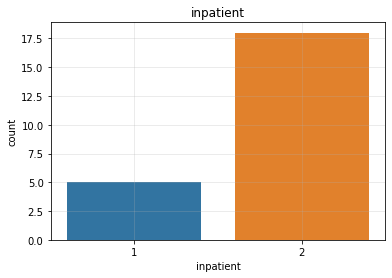

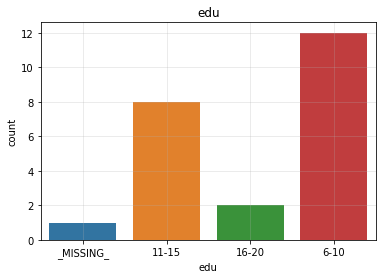

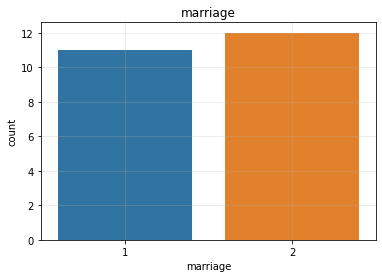

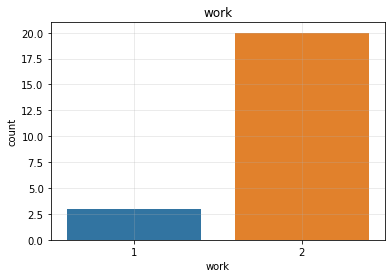

In [126]:
for f in features_cat:
    sns.countplot(x=df_condition[f])
    pl.title(f)
    pl.grid(alpha=.3)
    pl.show()